# Behavioral analysis
This notebook analyses the eye-tracking behavioral data from wd_room experiment.
Participants were instructed to attend a fixation-cross preceeding stimulus presentation.
We defined a valid trial as those where participants fixated to the center of the image (as instructed) for at least 70-80 % of the duration of stimulus presentation (500 ms)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [11]:
# eye_path =  "data/eye_tracking/"
eye_path =  "data/streams_csv/"
df = pd.read_csv(eye_path + "all_streams_87c8f5f3-9dc8-481b-821e-7fc676da19f5.csv")
# df = pd.read_csv(eye_path + "et_87c8f5f3-9dc8-481b-821e-7fc676da19f5.csv")
df
# jj

/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (14,16,59,60,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,uid,blockNumber_ImageInfo,imageName_ImageInfo,time_stamps_ImageInfo,corrected_tstamps_ImageInfo,normalized_tstamps_ImageInfo,cFrame_Visual,displayStatus_Visual,worldTime_Visual,time_stamps_Visual,...,centered_fixations,total_fixations,valid_fixation,ob_names,latency,type,valid,rotation,distance,block
0,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.194442,74451.002419,0.011108,4329.0,-1.0,85.366100,74451.194436,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.205621,74451.013597,0.022287,4330.0,-1.0,85.377270,74451.205614,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.216554,74451.024531,0.033220,4331.0,-1.0,85.388214,74451.216550,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.227691,74451.035667,0.044356,4332.0,-1.0,85.399345,74451.227685,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,startMessage,74451.238694,74451.046670,0.055359,4333.0,-1.0,85.410355,74451.238690,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381083,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.144506,78908.852441,4457.861131,385406.0,99.0,4543.284000,78909.144500,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
381084,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.155422,78908.863357,4457.872047,385407.0,99.0,4543.295400,78909.155416,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
381085,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.166441,78908.874377,4457.883066,385408.0,99.0,4543.306000,78909.166438,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
381086,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,endMessage,78909.177579,78908.885514,4457.894204,385409.0,99.0,4543.317400,78909.177574,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [5]:
eye_df = df[df['displayStatusNames'] == 'image']
eye_df

,uid,blockNumber_ImageInfo,imageName_ImageInfo,time_stamps_ImageInfo,corrected_tstamps_ImageInfo,normalized_tstamps_ImageInfo,cFrame_Visual,displayStatus_Visual,worldTime_Visual,time_stamps_Visual,...,centered_fixations,total_fixations,valid_fixation,ob_names,latency,type,valid,rotation,distance,block
1158,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.055533,74463.863221,12.871911,5487.0,0.0,98.227104,74464.055529,...,46.0,46.0,True,Cathedral,12.871911,object,1,3.0,17.0,0.0
1159,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.066479,74463.874167,12.882856,5488.0,0.0,98.238045,74464.066476,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1160,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.077505,74463.885193,12.893882,5489.0,0.0,98.249080,74464.077503,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1161,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.088515,74463.896202,12.904892,5490.0,0.0,98.260086,74464.088510,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1162,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.099681,74463.907368,12.916057,5491.0,0.0,98.271250,74464.099678,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381059,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.877825,78908.585766,4457.594456,385382.0,0.0,4543.017600,78908.877822,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381060,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.888832,78908.596773,4457.605462,385383.0,0.0,4543.029000,78908.888829,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381061,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.900010,78908.607951,4457.616640,385384.0,0.0,4543.040000,78908.900007,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381062,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.911095,78908.619036,4457.627726,385385.0,0.0,4543.051000,78908.911093,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN


(-1.0, 1.0)

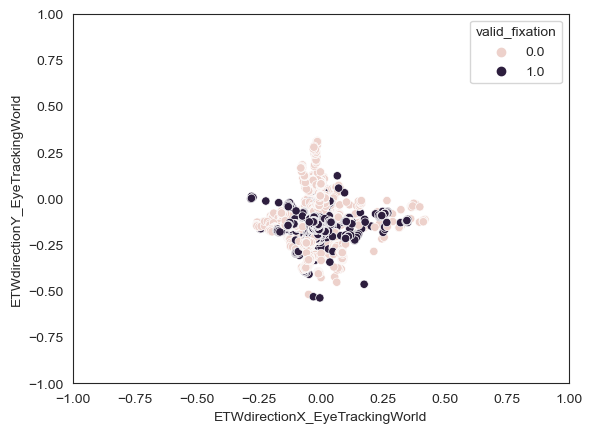

In [6]:
g = sns.scatterplot(x=eye_df['ETWdirectionX_EyeTrackingWorld'],y=eye_df['ETWdirectionY_EyeTrackingWorld'],hue='valid_fixation', data=eye_df)
g.set_xlim(-1,1)
g.set_ylim(-1,1)

<Axes: ylabel='Count'>

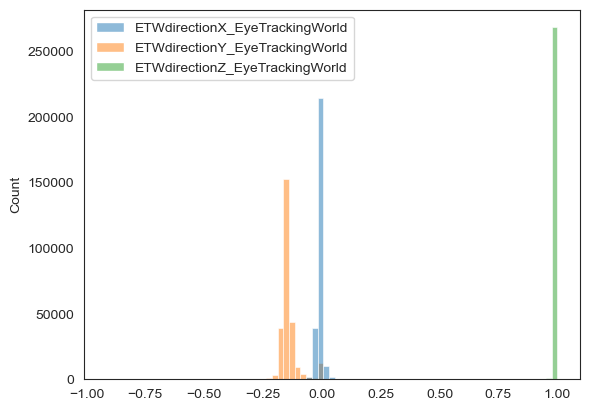

In [7]:
sns.histplot(data=df[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld','ETWdirectionZ_EyeTrackingWorld']])

<Axes: >

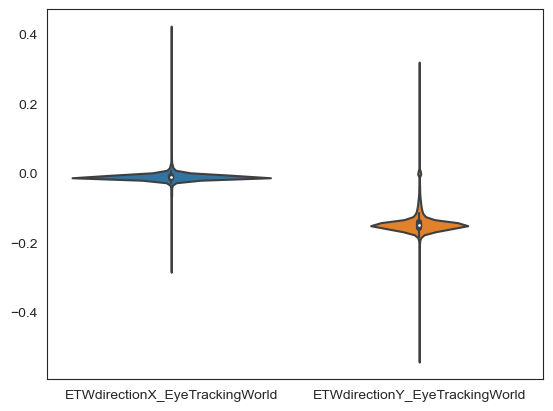

In [8]:
# sns.boxplot(data=eye_df[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld']], showfliers=True)
sns.violinplot(data=eye_df[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld']])

In [9]:
eye_valid = eye_df[eye_df['valid_fixation'] == True]
eye_valid

,uid,blockNumber_ImageInfo,imageName_ImageInfo,time_stamps_ImageInfo,corrected_tstamps_ImageInfo,normalized_tstamps_ImageInfo,cFrame_Visual,displayStatus_Visual,worldTime_Visual,time_stamps_Visual,...,centered_fixations,total_fixations,valid_fixation,ob_names,latency,type,valid,rotation,distance,block
1158,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.055533,74463.863221,12.871911,5487.0,0.0,98.227104,74464.055529,...,46.0,46.0,True,Cathedral,12.871911,object,1,3.0,17.0,0.0
1159,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.066479,74463.874167,12.882856,5488.0,0.0,98.238045,74464.066476,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1160,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.077505,74463.885193,12.893882,5489.0,0.0,98.249080,74464.077503,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1161,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.088515,74463.896202,12.904892,5490.0,0.0,98.260086,74464.088510,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
1162,87c8f5f3-9dc8-481b-821e-7fc676da19f5,0,img.1600x1000.date.2022-07-07_20-03-02.hitname...,74464.099681,74463.907368,12.916057,5491.0,0.0,98.271250,74464.099678,...,46.0,46.0,True,Cathedral,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381059,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.877825,78908.585766,4457.594456,385382.0,0.0,4543.017600,78908.877822,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381060,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.888832,78908.596773,4457.605462,385383.0,0.0,4543.029000,78908.888829,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381061,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.900010,78908.607951,4457.616640,385384.0,0.0,4543.040000,78908.900007,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN
381062,87c8f5f3-9dc8-481b-821e-7fc676da19f5,3,img.1600x1000.date.2022-07-12_00-01-19.hitname...,78908.911095,78908.619036,4457.627726,385385.0,0.0,4543.051000,78908.911093,...,39.0,45.0,True,Trashcans_mesh (4),NaN,NaN,1,NaN,NaN,NaN


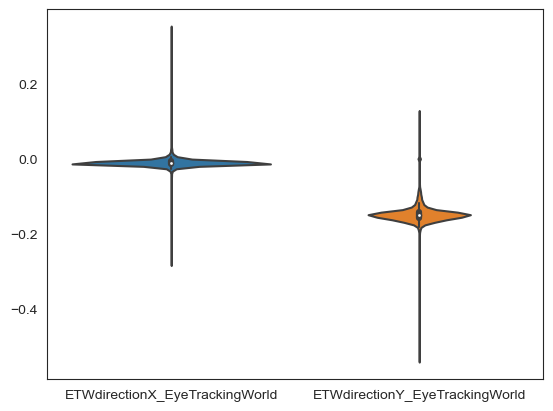

In [10]:
p = sns.violinplot(data=eye_valid[['ETWdirectionX_EyeTrackingWorld','ETWdirectionY_EyeTrackingWorld']], showfliers=False)